# Chapter 4. Probabilistic Learning – Classification Using Naive Bayes

## Understanding Naive Bayes

The Naive Bayes algorithm is from 18th century mathematician Thomas Bayes, who developed foundational principles to describe the probability of events, and how probabilities should be revised in the light of additional information. These principles formed the foundation for what are now known as **Bayesian methods**.

Bayesian probability theory is rooted in the idea that the estimated likelihood of an event should be based on the evidence at hand across multiple trials, or opportunities for the event to occur.

## Probablity Review

The probability of an event is estimated from the observed data by dividing the number of trials in which the event occurred by the total number of trials.

it rained 3 out of 10 days: $P(rain)=3/10=0.3$

10 out of 50 prior email messages were spam: $P(spam)=10/50=0.2$

Ham (nonspam) and spam are mutually exclusive and exhaustive events: $P(ham)=1-0.2=0.8$

- **Joint probability**: $P(A ∩ B)$
- **Conditional probability(the probability of A given B occurs)**: $P(A \mid B)$  
- If A and B are **independent events**, $P(A ∩ B) = P(A) * P(B)$.

We know that 20 percent of all messages were spam (the left circle) and 5 percent of all messages contained the word Viagra (the right circle).

If 20 percent of all the messages are spam, and 5 percent of all the e-mails contain the word Viagra, we could assume that 1 percent of all messages are spam with the term Viagra. This is because 0.05 * 0.20 = 0.01.

### BAYES' THEOREM

The following formulation provides a way of thinking about how to revise an estimate of the probability of one event in light of the evidence provided by another event:

$P(A\mid B)=\frac{P(A \cap B)}{P(B)}$

The notation P(A|B) is read as the probability of event A, given that event B occurred. This is known as conditional probability, since the probability of A is dependent (that is, conditional) on what happened with event B. Bayes' theorem tells us that our estimate of P(A|B) should be based on P(A ∩ B), a measure of how often A and B are observed to occur together, and P(B), a measure of how often B is observed to occur in general.

By definition, $P(A ∩ B) = P(A|B) * P(B)$, can also be written as $P(A ∩ B) = P(B|A) * P(A)$ , which we can then use in the following formulation of **Bayes' theorem**:

$P(A\mid B)=\frac{P(A \cap B)}{P(B)}=\frac{P(B \mid A)P(A)}{P(B)}$

- Use spam filter as an example:
- The chance of an email containing the word "Viagra" is a spam.  
- Without knowledge of an incoming message's content, the best estimate of its spam status would be $P(spam)$, the probability that any prior message was spam, which we calculated previously to be 20 percent. This estimate is known as the **prior probability**.

- Suppose that you obtained additional evidence by looking the probability that the word Viagra was used in previous spam messages, or $P(Viagra|spam)$, is called the **likelihood**. The probability that Viagra appeared in any message at all, or $P(Viagra)$, is known as the **marginal likelihood**.

By applying Bayes' theorem to this evidence, we can compute a **posterior probability** that measures how likely the message is to be spam. If the posterior probability is greater than 50 percent, the message is more likely to be spam than ham and it should perhaps be filtered. The following formula shows how Bayes' theorem is applied to the evidence provided by the previous e-mail messages:

In [2]:
%load_ext rpy2.ipython
from PIL import Image

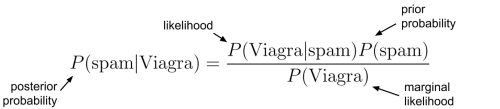

In [7]:
from PIL import Image 
myImage1 = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch4_NA_Bayes/bayes.png")
display(myImage1)

### Frequency table and Likelihood table

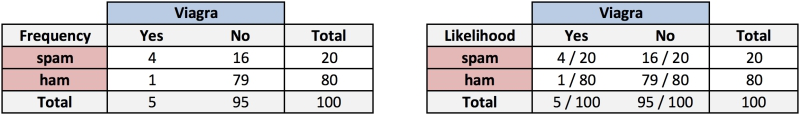

In [5]:
myImage2 = Image.open("/Users/jiaoyu//Documents/Ph.D/teaching/Machine_learning_with_R/ch4_NA_Bayes/table.png")
display(myImage2)

The likelihood table reveals that P(Viagra=Yes|spam) = 4/20 = 0.20, indicating that the probability is 20 percent that a message contains the term Viagra, given that the message is spam. Additionally, since P(A ∩ B) = P(B|A) * P(A), we can calculate P(spam ∩ Viagra) as P(Viagra|spam) * P(spam) = (4/20) * (20/100) = 0.04. The same result can be found in the frequency table, which notes that 4 out of the 100 messages were spam with the term Viagra. Either way, this is four times greater than the previous estimate of 0.01 we calculated as P(A ∩ B) = P(A) * P(B) under the false assumption of independence.

To compute the posterior probability, P(spam|Viagra), we simply take P(Viagra|spam) * P(spam) / P(Viagra) or (4/20) * (20/100) / (5/100) = 0.80. Therefore, the probability is 80 percent that a message is spam, given that it contains the word Viagra. 

### The Naive Bayes algorithm

The strengths and weaknesses of this algorithm 

- **Strengths** 
- Simple, fast, and very effective
- Does well with noisy and missing data
- Requires relatively few examples for training, but also works well with very large numbers of examples
- Easy to obtain the estimated probability for a prediction

- **Weaknesses**
- Relies on an often-faulty assumption of equally important and independent features
- Not ideal for datasets with many numeric features
- Estimated probabilities are less reliable than the predicted classes

The Naive Bayes algorithm is named as such because it makes some "naive" assumptions about the data. In particular, Naive Bayes assumes that all of the features in the dataset are equally important and independent. These assumptions are rarely true in most real-world applications. However, in most cases when these assumptions are violated, Naive Bayes still performs fairly well.

### Classification with naive Bayes

Let's extend our spam filter by adding a few additional terms to be monitored in addition to the term Viagra: Money, Groceries, and Unsubscribe. The Naive Bayes learner is trained by constructing a likelihood table for the appearance of these four words (labeled W1, W2, W3, and W4), as shown in the following diagram for 100 e-mails:

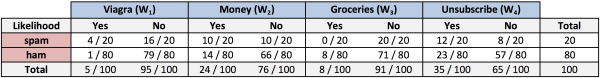

In [4]:
myImage3 = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch4_NA_Bayes/bayes_1.png")
display(myImage3)

Suppose that a message contains the terms Viagra and Unsubscribe, but does not contain either Money or Groceries.Using Bayes' theorem, we can define the problem:

$P(spam\mid w_{1}\cap ¬w_{2}\cap ¬w_{3}\cap w_{4})=\frac{P(w_{1}\cap ¬w_{2}\cap ¬w_{3}\cap w_{4})\mid spam)P(spam)}{P(w_{1}\cap ¬w_{2}\cap ¬w_{3}\cap w_{4})}$

Assumption: **class-conditional independence**, which means that events are independent so long as they are conditioned on the same class value. Assuming conditional independence allows us to simplify the formula using the probability rule for independent events, which states that P(A ∩ B) = P(A) * P(B)

Because the denominator does not depend on the class (spam or ham), it is treated as a constant value and can be ignored for the time being. This means that the conditional probability of spam can be expressed as:

$P(spam\mid w_{1}\cap ¬w_{2}\cap ¬w_{3}\cap w_{4})\propto P(w_{1}\mid spam)P(¬w_{2}\mid spam)P(¬w_{3}\mid spam) P(w_{4}\mid spam)P(spam)$

And the probability that the message is ham can be expressed as:

$P(ham\mid w_{1}\cap ¬w_{2}\cap ¬w_{3}\cap w_{4})\propto P(w_{1}\mid ham)P(¬w_{2}\mid ham)P(¬w_{3}\mid ham) P(w_{4}\mid ham)P(ham)$

Using the values in the likelihood table, we can start filling numbers in these equations. The overall likelihood of spam is then:

(4/20) * (10/20) * (20/20) * (12/20) * (20/100) = 0.012

While the likelihood of ham is:

(1/80) * (66/80) * (71/80) * (23/80) * (80/100) = 0.002

Because 0.012/0.002 = 6, we can say that this message is six times more likely to be spam than ham.


To convert these numbers into probabilities, the probability of spam is equal to the likelihood that the message is spam divided by the likelihood that the message is either spam or ham:

0.012/(0.012 + 0.002) = 0.857

Similarly, the probability of ham is equal to the likelihood that the message is ham divided by the likelihood that the message is either spam or ham:

0.002/(0.012 + 0.002) = 0.143

The **Naive Bayes classification algorithm** we used in the preceding example can be summarized by the following formula:

$P(C_{L}\mid F_{1},...,F_{n})= \frac{1}{Z}P(C_{L})\prod_{i = 1}^{n}p(F_{i}\mid C_{L})$

The probability of level L for class C, given the evidence provided by features F1 through Fn, is equal to the product of the probabilities of each piece of evidence conditioned on the class level, the prior probability of the class level, and a scaling factor 1/Z, which converts the likelihood values into probabilities

### The Laplace Estimator

Suppose that we received another message, this time containing all four terms: Viagra, Groceries, Money, and Unsubscribe. Using the Naive Bayes algorithm as before, we can compute the likelihood of spam as:

(4/20) * (10/20) * (0/20) * (12/20) * (20/100) = 0

The likelihood of ham is:

(1/80) * (14/80) * (8/80) * (23/80) * (80/100) = 0.00005

Therefore, the probability of spam is:

0/(0 + 0.00005) = 0

The probability of ham is:

0.00005/(0 + 0. 0.00005) = 1

It is very likely that the message has been incorrectly classified

The Laplace estimator essentially adds a small number to each of the counts in the frequency table, which ensures that each feature has a nonzero probability of occurring with each class. Typically, the Laplace estimator is set to 1, which ensures that each class-feature combination is found in the data at least once.

The likelihood of spam now is:

(5/24) * (11/24) * (1/24) * (13/24) * (20/100) = 0.0004

The likelihood of ham is:

(2/84) * (15/84) * (9/84) * (24/84) * (80/100) = 0.0001

This means that the probability of spam is 80 percent, and the probability of ham is 20 percent,


#### Using iris data to train a naive bayes model

In [6]:
from sklearn.datasets import load_iris 
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(iris.data)
print("Number of mislabeled points : %d" % (iris.target != y_pred).sum())
print("Accuracy NB: {:.2f}".format(NB.score(X_test, y_test)))

Number of mislabeled points : 6


NB model misclassifies 6 out of 160 cases. 

In [ ]:
%%R -i df -w 5 -h 5 --units in -r 200
  
##### Chapter 4: Classification using Naive Bayes --------------------

## Example: Filtering spam SMS messages ----
## Step 2: Exploring and preparing the data ---- 

# read the sms data into the sms data frame
sms_raw <- read.csv("sms_spam.csv", stringsAsFactors = FALSE)

# examine the structure of the sms data
str(sms_raw)

# convert spam/ham to factor.
sms_raw$type <- factor(sms_raw$type)

# examine the type variable more carefully
str(sms_raw$type)
table(sms_raw$type)

# build a corpus using the text mining (tm) package
library(tm)
sms_corpus <- VCorpus(VectorSource(sms_raw$text))

# examine the sms corpus
print(sms_corpus)
inspect(sms_corpus[1:2])

as.character(sms_corpus[[1]])
lapply(sms_corpus[1:2], as.character)

# clean up the corpus using tm_map()
sms_corpus_clean <- tm_map(sms_corpus, content_transformer(tolower))

# show the difference between sms_corpus and corpus_clean
as.character(sms_corpus[[1]])
as.character(sms_corpus_clean[[1]])

sms_corpus_clean <- tm_map(sms_corpus_clean, removeNumbers) # remove numbers
sms_corpus_clean <- tm_map(sms_corpus_clean, removeWords, stopwords()) # remove stop words
sms_corpus_clean <- tm_map(sms_corpus_clean, removePunctuation) # remove punctuation

# tip: create a custom function to replace (rather than remove) punctuation
removePunctuation("hello...world")
replacePunctuation <- function(x) { gsub("[[:punct:]]+", " ", x) }
replacePunctuation("hello...world")

# illustration of word stemming
library(SnowballC)
wordStem(c("learn", "learned", "learning", "learns"))

sms_corpus_clean <- tm_map(sms_corpus_clean, stemDocument)

sms_corpus_clean <- tm_map(sms_corpus_clean, stripWhitespace) # eliminate unneeded whitespace

# examine the final clean corpus
lapply(sms_corpus[1:3], as.character)
lapply(sms_corpus_clean[1:3], as.character)

# create a document-term sparse matrix
sms_dtm <- DocumentTermMatrix(sms_corpus_clean)

# alternative solution: create a document-term sparse matrix directly from the SMS corpus
sms_dtm2 <- DocumentTermMatrix(sms_corpus, control = list(
  tolower = TRUE,
  removeNumbers = TRUE,
  stopwords = TRUE,
  removePunctuation = TRUE,
  stemming = TRUE
))

# alternative solution: using custom stop words function ensures identical result
sms_dtm3 <- DocumentTermMatrix(sms_corpus, control = list(
  tolower = TRUE,
  removeNumbers = TRUE,
  stopwords = function(x) { removeWords(x, stopwords()) },
  removePunctuation = TRUE,
  stemming = TRUE
))

# compare the result
sms_dtm
sms_dtm2
sms_dtm3

# creating training and test datasets
sms_dtm_train <- sms_dtm[1:4169, ]
sms_dtm_test  <- sms_dtm[4170:5559, ]

# also save the labels
sms_train_labels <- sms_raw[1:4169, ]$type
sms_test_labels  <- sms_raw[4170:5559, ]$type

# check that the proportion of spam is similar
prop.table(table(sms_train_labels))
prop.table(table(sms_test_labels))

# word cloud visualization
library(wordcloud)
wordcloud(sms_corpus_clean, min.freq = 50, random.order = FALSE)

# subset the training data into spam and ham groups
spam <- subset(sms_raw, type == "spam")
ham  <- subset(sms_raw, type == "ham")

wordcloud(spam$text, max.words = 40, scale = c(3, 0.5))
wordcloud(ham$text, max.words = 40, scale = c(3, 0.5))

sms_dtm_freq_train <- removeSparseTerms(sms_dtm_train, 0.999)
sms_dtm_freq_train

# indicator features for frequent words
findFreqTerms(sms_dtm_train, 5)

# save frequently-appearing terms to a character vector
sms_freq_words <- findFreqTerms(sms_dtm_train, 5)
str(sms_freq_words)

# create DTMs with only the frequent terms
sms_dtm_freq_train <- sms_dtm_train[ , sms_freq_words]
sms_dtm_freq_test <- sms_dtm_test[ , sms_freq_words]

# convert counts to a factor
convert_counts <- function(x) {
  x <- ifelse(x > 0, "Yes", "No")
}

# apply() convert_counts() to columns of train/test data
sms_train <- apply(sms_dtm_freq_train, MARGIN = 2, convert_counts)
sms_test  <- apply(sms_dtm_freq_test, MARGIN = 2, convert_counts)

## Step 3: Training a model on the data ----
library(e1071)
sms_classifier <- naiveBayes(sms_train, sms_train_labels)

## Step 4: Evaluating model performance ----
sms_test_pred <- predict(sms_classifier, sms_test)

library(gmodels)
CrossTable(sms_test_pred, sms_test_labels,
           prop.chisq = FALSE, prop.t = FALSE, prop.r = FALSE,
           dnn = c('predicted', 'actual'))

## Step 5: Improving model performance ----
sms_classifier2 <- naiveBayes(sms_train, sms_train_labels, laplace = 1)
sms_test_pred2 <- predict(sms_classifier2, sms_test)
CrossTable(sms_test_pred2, sms_test_labels,
           prop.chisq = FALSE, prop.t = FALSE, prop.r = FALSE,
           dnn = c('predicted', 'actual'))

